In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)

sns.set_theme()

%matplotlib inline

In [3]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Conceptual

### **Q1.** 

Starting with (4.2): 
$$
p(X) = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}
$$

Multiply both sides by:
$$
1 + e^{\beta_0 + \beta_1 X} \
$$


To get:
$$
p(X) + p(X) e^{\beta_0 + \beta_1 X} = e^{\beta_0 + \beta_1 X}
$$
Rearranging the terms:
$$
p(X) = e^{\beta_0 + \beta_1 X} - p(X) e^{\beta_0 + \beta_1 X}
$$
Factoring out $e^{\beta_0 + \beta_1 X}$ and dividing both sides by the remainder:
$$
\frac{p(X)}{1-p(X)} = e^{\beta_0 + \beta_1 X}
$$
We get (4.3) which is what we set out to prove.

### **Q2.**

$$
p_k(x) = \frac{\pi_k \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{1}{2\sigma^2} (x - \mu_k)^2\right)}
{\sum_{l=1}^{K} \pi_l \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{1}{2\sigma^2} (x - \mu_l)^2\right)}
$$

Taking the $ log $ of both sides:
$$
log(p_k(x)) = log(\pi_k \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{1}{2\sigma^2} (x - \mu_k)^2\right)) - log(\sum_{l=1}^{K} \pi_l \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{1}{2\sigma^2} (x - \mu_l)^2\right))
$$

$$
log(p_k(x)) = log(\pi_k) + log(\frac{1}{\sqrt{2\pi}\sigma}) + log(\exp\left(-\frac{1}{2\sigma^2} (x - \mu_k)^2\right))) - log(\sum_{l=1}^{K} \pi_l \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{1}{2\sigma^2} (x - \mu_l)^2\right))
$$

To maximize the value of the function above over all k we only need to consider terms that vary with  k: 

$$
log(\pi_k) - \frac{1}{2\sigma^2} * (x^2 -2 \mu_k x + \mu_k^2)
$$

$$
log(\pi_k) -\frac{1}{2\sigma^2} * x^2 +\frac{1}{\sigma^2} \mu_k x - \frac{1}{2\sigma^2} \mu_k^2
$$

The term $ -\frac{x^2}{2\sigma^2} $ is constant across all values of k so we can ignore it and the remaining 3 terms are what we have to consider:

$$
\delta_k(x) = x \cdot \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + \log(\pi_k)
$$

### **Q3.**

This question is similar to the previous question except for the assumption that $\sigma_1^2 = ... = \sigma_K^2$ which we don't apply here:

$$
p_k(x) = \frac{\pi_k \frac{1}{\sqrt{2\pi}\sigma_k} \exp\left(-\frac{1}{2\sigma_k^2} (x - \mu_k)^2\right)}
{\sum_{l=1}^{K} \pi_l \frac{1}{\sqrt{2\pi}\sigma_l} \exp\left(-\frac{1}{2\sigma_l^2} (x - \mu_l)^2\right)}
$$

Following the same steps used in the above question, taking the log and considering only terms that vary with k:

$$
log(p_k(x)) = log(\pi_k) + log(\frac{1}{\sqrt{2\pi}\sigma_k}) + log(\exp\left(-\frac{1}{2\sigma_k^2} (x - \mu_k)^2\right))) - log(\sum_{l=1}^{K} \pi_l \frac{1}{\sqrt{2\pi}\sigma_l} \exp\left(-\frac{1}{2\sigma_l^2} (x - \mu_l)^2\right))
$$

$$
log(\frac{\pi_k}{\sigma_k}) -\frac{1}{2\sigma_k^2} * x^2 +\frac{1}{\sigma_k^2} \mu_k x - \frac{1}{2\sigma_k^2} \mu_k^2
$$

We can see that the discriminant function takes the form:  
$$
\delta_k(x) = log(\frac{\pi_k}{\sigma_k}) -\frac{x^2}{2\sigma_k^2} + x \frac{\mu_k}{\sigma_k^2}  - \frac{\mu_k^2}{2\sigma_k^2}
$$

Which is quadratic in x.

### **Q4.**

**(a)** To answer this question we can imagine a kernel of width 0.1 sweeping along the X-axis from 0 to 1, where the area of the kernel around a point X corresponds to the fraction of available observations we use to make a prediction for the response of test observation X.

The following figure just helps us visualise what we mean to do. And intuitivly the result should be close to 10% since it stays 10% for all points in the range [0.05, 0.95] and slightly decreases outside that range.

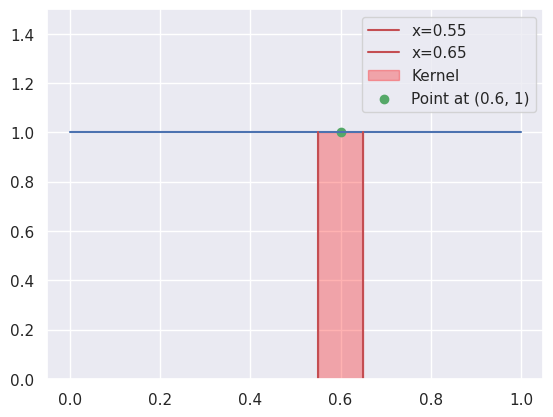

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_ylim([0, 1.5])

# Plot the horizontal line
ax.plot([0, 1], [1, 1], c='b')  

# Add vertical red lines using ax.plot (absolute coordinates)
ax.plot([0.55, 0.55], [0, 1], c='r', label='x=0.55')  # Line from y=0 to y=1
ax.plot([0.65, 0.65], [0, 1], c='r', label='x=0.65')  # Line from y=0 to y=1

# Shade the area between the two vertical lines
ax.axvspan(0.55, 0.65, 0, 1/ax.get_ylim()[1], color='red', alpha=0.3, label='Kernel')

ax.scatter(0.6, 1, c='g', label='Point at (0.6, 1)')
ax.legend()

plt.show()

In [5]:
within = 0.1
lim = within/2
obs = np.linspace(0, 1, 1001)
used_obs = np.array([])
for i in obs:
    left = i - lim
    if left < 0:
        left = 0
    
    right = i + lim 
    if right > 1:
        right = 1
    # print(f'[{left:.2f}, {right:.2f}]')
    used_obs = np.append(used_obs, right - left)

0.09745254745254749

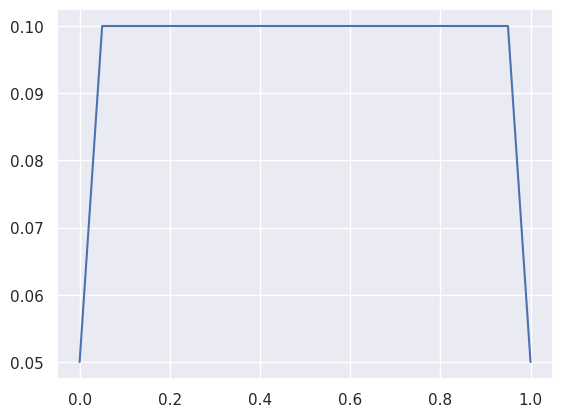

In [6]:
plt.plot(obs, used_obs);
used_obs.mean()

We can see that on average, the fraction of available observations we use to make the prediction is **9.75%**.

**(b)** Extending the idea above from 2 dimensions (p = 1) to 3 dimensions (p = 2).

In [7]:
within = 0.10
lim = within/2
obs = np.arange(0, 1, 0.01)
p = 2
used_obs = []
for n in range(p):

    used_obs_dim = []
    for i in obs:
        min = i - lim
        if min < 0:
            min = 0
        
        max = i + lim 
        if max > 1:
            max = 1
            
        # print(f'[{min:.2f}, {max:.2f}]')
        used_obs_dim.append(max - min)
    used_obs.append(used_obs_dim)

used_obs = np.array(used_obs)

In [8]:
import operator 
from functools import reduce

grid = np.meshgrid(*used_obs, indexing="ij")

result = reduce(operator.mul, grid)
result.mean()

0.009506250000000008

We can see that on average we use **0.95%** of the available observations to make the prediction.

**(c)**

Similar to what we did above we just extend the same ideas to a 101 dimensions (p = 100). Creating the grid for the data would be troublesome so we'll just use the fact that from every dimension we use 9.75% of the data like so.
$$
0.0975 ^ p
$$ 

In [9]:
0.0975 ** 2

0.00950625

We can see that we get the same result we calculated above for p = 2.

In [10]:
0.0975 ** 100

7.951728986183188e-102

As we can see the value is so miniscule that we're practically using almost 0% of the available observations to make a prediction.

**(d)** Looking at our answers from (a)-(c) we can see that the more predictors we use while considering a non-parametric method like KNN, the less test observations are used to make the prediction, since data points become very sparse in higher dimensions.

**(e)** To find the sidelength of the hypercube that contains 10% of the testing observations we just need to find the sidelength of a p-dimensional hypercube that has a p-dimensional "area" of 0.10.
$$
x ^ p = 0.10
$$

for $p = 1$ that'd be:
$$
x = 0.10
$$

for $p = 2$ that'd be:

In [11]:
np.power(0.10, 1/2)

0.31622776601683794

$$
x = \sqrt{0.10} \\
x = 0.3163
$$

for $ p = 100 $:


In [12]:
np.power(0.10, 1/100)

0.9772372209558108

$$
x = \sqrt[^{100}]{0.10}\\
x = 0.977
$$

We can see that for large values of p the sidelength of the hypercube gets so big to the point where it's close to 1 but only 10% of test observations fall within the hypercube, which is a testament to how sparse data in high dimensional space gets.


I'll create a plot to capture that relation for various values of p:

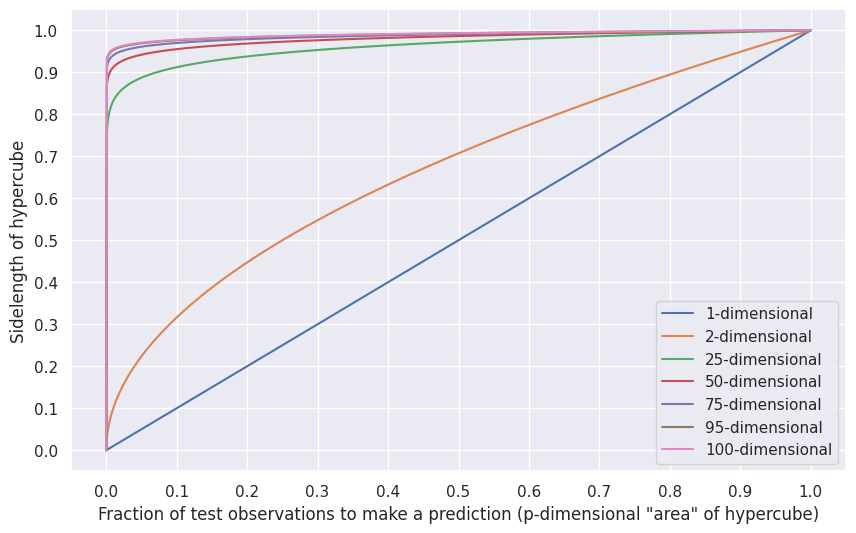

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
for p in [1, 2, 25, 50, 75, 95, 100]:
    x = np.linspace(0, 1, 1001)
    ax.plot(x, np.power(x, 1/p), label=f'{p}-dimensional')

ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_xlabel('Fraction of test observations to make a prediction (p-dimensional "area" of hypercube)')
ax.set_ylabel('Sidelength of hypercube')
ax.legend();

### **Q5.**

**(a)** We expect QDA to perform better on the training set than LDA due to it being a more flexible model, however we expect LDA to perform better on the test set since it'd have less bias due to the Bayes decision boundary being linear.

**(b)** QDA would perform better on both the training and test sets, because here the increase in variance from using a more flexible model (QDA) is offset by a decrease in bias due to the Bayes decision boundary being non-linear.

**(c)** We expect it to improve, as the additional incurred cost in variance from choosing a more flexible classifer (QDA over LDA) is offset by the large sample size.

**(d)** False. Because the resulting increase in variance from using a more flexible model isn't offset by any decrease in bias since the Bayes decision boundary is linear hence LDA would have a better test error rate than QDA.

### **Q6.**


**(a)** We can simply do that using the formula:
$$
p(Hours, GPA) = \frac{e^{\beta_0 + \beta_1 * Hours + \beta_2 * GPA}}{1+e^{\beta_0 + \beta_1 * Hours + \beta_2 * GPA}}
$$

In [14]:
b0 = -6 
b1 = 0.05
b2 = 1

def predict(Hours, GPA):
    numerator = np.exp(b0 + b1 * Hours + b2 * GPA)
    denominator = 1 + np.exp(b0 + b1 * Hours + b2 * GPA)
    
    return numerator / denominator

In [15]:
predict(40, 3.5)

0.37754066879814546

The student has a probability of **37.75%** to get an A in that class. 

**(b)** To find the amount of time he's required to study to make his probability of getting an A 50% we just plug 50% for $p$ and solve for $Hours$:

$$
log(\frac{p}{1-p}) = \beta_0 + \beta_1 * Hours + \beta_2 * GPA
$$

In [16]:
p = 0.5
GPA = 3.5
Hours = (np.log(p/(1-p)) - b0 - b2 * GPA)/b1
Hours

50.0

We see that he needs to study 10 more hours (for a total of **50 hours**) to increase his probability of getting an A to 50%.

### **Q7.**

From the given information we can see that the assumptions are the same as those for LDA, namely X follows a normal distribution with constant variance across the classes.
$$
\bar{X}_{Yes} = 10 \\
\bar{X}_{No} = 0 \\ 
\sigma_{Yes}^2 = \sigma_{No}^2 = 36 \\
\pi_{Yes} = 0.8 \\
\pi_{No} = 0.2
$$

Using Bayes' theorem with the assumption that $f_k(x)$ is normally distributed:
$$
p_k(x) = \frac{\pi_k \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{1}{2\sigma^2} (x - \mu_k)^2\right)}
{\sum_{l=1}^{K} \pi_l \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{1}{2\sigma^2} (x - \mu_l)^2\right)}
$$

In [17]:
def f(x, mean, variance, prior):
    return prior * (1/np.sqrt(2 * np.pi * variance)) * np.exp((-1/(2*variance)) * (x - mean)**2)

In [18]:
f(4, 10, 36, 0.8)/(f(4, 0, 36, 0.2) + f(4, 10, 36, 0.8))

0.7518524532975261

$$
p_{Yes}(4) = 0.7519 
$$

We can see that a company that had a percentage profit of X = 4 last year has a probability of **75.19%** to issue a dividend this year.

### **Q8.**


We should still use logistic regression because it's very likely that the KNN (with K=1) classifier overfit to the data resulting in a training error rate of around 0% and a test error rate of 36% which is higher than LR's 30% test error rate.

### **Q9.**

**(a)**
$$
odds = \frac{p(X)}{1-p(X)} \\
\\
p(X) = \frac{odds}{1+ odds}
$$

In [19]:
0.37/(1 + 0.37)

0.27007299270072993

**27%** of people with an odds of 0.37 of defaulting on their credit card will default.

**(b)**

In [20]:
0.16/(1 - 0.16)

0.1904761904761905

She has an odds of **0.19** that she'll default. 

### **Q10.**

Starting with:
$$
log(\frac{Pr(Y = k | X = x)}{Pr(Y = K | X = x)}) = log(\frac{\pi_k f_k(x)}{\pi_K f_K(x)})
$$

And considering the case for $p = 1$, where the means $\mu_1, ..., \mu_K$ and variance $\sigma^2$ are scalars:
$$
f_k(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} exp(\frac{-(x-\mu_k)^2}{2\sigma^2})
$$    

$$
\begin{align*}
log(\frac{\pi_k f_k(x)}{\pi_K f_K(x)}) &= log(\frac{\pi_k exp(\frac{-(x-\mu_k)^2}{2\sigma^2})}{\pi_K exp(\frac{-(x-\mu_K)^2}{2\sigma^2})}) \\

&= log(\pi_k exp(\frac{-(x-\mu_k)^2}{2\sigma^2}) - log(\pi_K exp(\frac{-(x-\mu_K)^2}{2\sigma^2}) \\ 

&= log(\pi_k) -\frac{(x-\mu_k)^2}{2\sigma^2} + \frac{(x-\mu_K)^2}{2\sigma^2}) - log(\pi_K) \\ 

&= log(\frac{\pi_k}{\pi_K}) - \frac{1}{2\sigma^2} (x^2 - 2 \mu_k x + \mu_k^2) + \frac{1}{2\sigma^2} (x^2 - 2 \mu_K x + \mu_K^2) \\ 

&= log(\frac{\pi_k}{\pi_K}) - \frac{(\mu_K^2 - \mu_k^2)}{2\sigma^2} + \frac{(\mu_k - \mu_K)}{\sigma^2}  x \\

&= a_k + b_k x

\end{align*}
$$

Where
$$
a_k = log(\frac{\pi_k}{\pi_K}) - \frac{(\mu_K^2 - \mu_k^2)}{2\sigma^2} \\ 

b_k = \frac{(\mu_k - \mu_K)}{\sigma^2}
$$ 

### **Q11.**

Starting with:
$$
log(\frac{Pr(Y = k | X = x)}{Pr(Y = K | X = x)}) = log(\frac{\pi_k f_k(x)}{\pi_K f_K(x)})
$$

And considering the case for $p > 1$, where the means $\mu_1, ..., \mu_K$ are p-dimensional vectors, and $\Sigma_1, ..., \Sigma_k$ are $p \times p$ covariance matrices (A multivariate normal distribution):
$$
\begin{align*}
f_k(\bold{x}) &= \frac{1}{\sqrt{(2 \pi)^p det(\bold{\Sigma_k})}} exp(-\frac{1}{2}(\bold x- \bold{\mu_k})^T \bold{\Sigma_k}^{-1} (\bold x- \bold{\mu_k})) \\
&= (2 \pi)^{-p/2} det(\bold{\Sigma_k})^{-1/2} exp(-\frac{1}{2}(\bold x- \bold{\mu_k})^T \bold{\Sigma_k}^{-1} (\bold x- \bold{\mu_k})) \\

\end{align*}
$$

$$
\begin{align*}

log(\frac{\pi_k f_k(\bold x)}{\pi_K f_K(\bold x)}) &=  log(\frac{\pi_k det(\bold{\Sigma_k})^{-1/2} exp(-\frac{1}{2}(\bold x- \bold{\mu_k})^T \bold{\Sigma_k}^{-1} (\bold x- \bold{\mu_k}))}{\pi_K  det(\bold{\Sigma_K})^{-1/2} exp(-\frac{1}{2}(\bold x- \bold{\mu_K})^T \bold{\Sigma_K}^{-1} (\bold x- \bold{\mu_K}))}) \\ 


&= log(\pi_k det(\bold{\Sigma_k})^{-1/2} ) -\frac{1}{2}(\bold x- \bold{\mu_k})^T \bold{\Sigma_k}^{-1} (\bold x- \bold{\mu_k}) - log(\pi_K  det(\bold{\Sigma_K})^{-1/2} ) + \frac{1}{2}(\bold x- \bold{\mu_K})^T \bold{\Sigma_K}^{-1} (\bold x- \bold{\mu_K}) \\


&= log(\frac{\pi_k}{\pi_K}) +  \frac{1}{2} log(\frac{det(\bold{\Sigma_K})}{det(\bold{\Sigma_k})} ) -\frac{1}{2}(\bold x- \bold{\mu_k})^T \bold{\Sigma_k}^{-1} (\bold x- \bold{\mu_k}) + \frac{1}{2}(\bold x- \bold{\mu_K})^T \bold{\Sigma_K}^{-1} (\bold x- \bold{\mu_K}) \\

&= log(\frac{\pi_k}{\pi_K}) +  \frac{1}{2} log(\frac{det(\bold{\Sigma_K})}{det(\bold{\Sigma_k})} ) - \frac{1}{2} \bold x^T \bold{\Sigma_k}^{-1} \bold x + \bold{\mu_k}^T \bold{\Sigma_k}^{-1} x - \frac{1}{2} \bold{\mu_k}^T \bold{\Sigma_k}^{-1} \mu_k + \frac{1}{2}\bold x^T \bold{\Sigma_K}^{-1} \bold x - \bold{\mu_K}^T \bold{\Sigma_K}^{-1} x + \frac{1}{2} \bold{\mu_K}^T \bold{\Sigma_K}^{-1} \mu_K\\


&= log(\frac{\pi_k}{\pi_K}) +  \frac{1}{2} log(\frac{det(\bold{\Sigma_K})}{det(\bold{\Sigma_k})} ) + \frac{1}{2} \bold x^T \bold(\bold{\Sigma_K}^{-1} - \bold{\Sigma_k}^{-1}) \bold x + (\bold{\mu_k}^T \bold{\Sigma_k}^{-1} - \bold{\mu_K}^T \bold{\Sigma_K}^{-1}) x + \frac{1}{2} (\bold{\mu_K}^T \bold{\Sigma_K}^{-1} \mu_K - \bold{\mu_k}^T \bold{\Sigma_k}^{-1} \mu_k)\\


&= log(\frac{\pi_k}{\pi_K}) +  \frac{1}{2} log(\frac{det(\bold{\Sigma_K})}{det(\bold{\Sigma_k})} ) + \frac{1}{2} (\bold{\mu_K}^T \bold{\Sigma_K}^{-1} \mu_K - \bold{\mu_k}^T \bold{\Sigma_k}^{-1} \mu_k) + (\bold{\mu_k}^T \bold{\Sigma_k}^{-1} - \bold{\mu_K}^T \bold{\Sigma_K}^{-1}) x + \frac{1}{2} \bold x^T (\bold{\Sigma_K}^{-1} - \bold{\Sigma_k}^{-1}) \bold x \\
 
&= a_k + \sum^{p}_{j=1} b_{kj} x_j + \sum^{p}_{j=1} \sum^{p}_{l=1} c_{kjl} x_j x_l
\end{align*}
$$

Where 
$$
a_k = log(\frac{\pi_k}{\pi_K}) +  \frac{1}{2} log(\frac{det(\bold{\Sigma_K})}{det(\bold{\Sigma_k})} ) + \frac{1}{2} (\bold{\mu_K}^T \bold{\Sigma_K}^{-1} \mu_K - \bold{\mu_k}^T \bold{\Sigma_k}^{-1} \mu_k) \\ 
$$
And
$$
b_{kj} = (\bold{\mu_k}^T \bold{\Sigma_k}^{-1} - \bold{\mu_K}^T \bold{\Sigma_K}^{-1})_j\\ 


c_{kjl} = \frac{1}{2} (\bold{\Sigma_K}^{-1} - \bold{\Sigma_k}^{-1})_{jl}
$$

Note: The notation above is just a way of indexing, indicating that for example $b_{kj}$ is the $j$ th component of $(\bold{\mu_k}^T \bold{\Sigma_k}^{-1} - \bold{\mu_K}^T \bold{\Sigma_K}^{-1})$.

### **Q12.**
**(a)**  
$$
\begin{align*}
log(\frac{Pr(Y = orange | X = x)}{Pr(Y = apple | X = x)}) &= log(\frac{Pr(Y = orange | X = x)}{1 - Pr(Y = orange | X = x)}) \\ 

&= log(\frac{\frac{exp(\hat{\beta}_0 + \hat{\beta}_1 x)}{1 + exp(\hat{\beta}_0 + \hat{\beta}_1 x)}}{1 - \frac{exp(\hat{\beta}_0 + \hat{\beta}_1 x)}{1 + exp(\hat{\beta}_0 + \hat{\beta}_1 x)}}) \\

&= log(\frac{\frac{exp(\hat{\beta}_0 + \hat{\beta}_1 x)}{1 + exp(\hat{\beta}_0 + \hat{\beta}_1 x)}}{\frac{1}{1 + exp(\hat{\beta}_0 + \hat{\beta}_1 x)}})  \\ 

&= log(exp(\hat{\beta}_0 + \hat{\beta}_1 x)) \\

&= \hat{\beta}_0 + \hat{\beta}_1 x

\end{align*}
$$

The log odds of orange versus apple in my model is $\hat{\beta}_0 + \hat{\beta}_1 x$

**(b)**
$$
\begin{align*}

log(\frac{Pr(Y = orange | X = x)}{Pr(Y = apple | X = x)}) &= log(\frac{\frac{exp(\hat{\alpha}_{orange0} + \hat{\alpha}_{orange1} x)}{exp(\hat{\alpha}_{orange0} + \hat{\alpha}_{orange1} x) + exp(\hat{\alpha}_{apple0} + \hat{\alpha}_{apple1} x)}}{\frac{exp(\hat{\alpha}_{apple0} + \hat{\alpha}_{apple1} x)}{exp(\hat{\alpha}_{orange0} + \hat{\alpha}_{orange1} x) + exp(\hat{\alpha}_{apple0} + \hat{\alpha}_{apple1} x)}}) \\ 

&= log(\frac{exp(\hat{\alpha}_{orange0} + \hat{\alpha}_{orange1} x)}{exp(\hat{\alpha}_{apple0} + \hat{\alpha}_{apple1} x)}) \\ 

&= (\hat{\alpha}_{orange0} - \hat{\alpha}_{apple0}) + (\hat{\alpha}_{orange1} - \hat{\alpha}_{apple1}) x\\

\end{align*}
$$

The log odds of orange versus apple in our friend's model is $(\hat{\alpha}_{orange0} - \hat{\alpha}_{apple0}) + (\hat{\alpha}_{orange1} - \hat{\alpha}_{apple1}) x$

**(c)**
The given coefficients for our model:
$$
\hat{\beta}_0 = 2 \\ 

\hat{\beta}_1 = -1 
$$

By equating the log odds results from both models:
$$
\hat{\beta}_0 + \hat{\beta}_1 x = (\hat{\alpha}_{orange0} - \hat{\alpha}_{apple0}) + (\hat{\alpha}_{orange1} - \hat{\alpha}_{apple1}) x \\

\hat{\beta}_0 = (\hat{\alpha}_{orange0} - \hat{\alpha}_{apple0}) \\ 

\hat{\beta}_1 = (\hat{\alpha}_{orange1} - \hat{\alpha}_{apple1})
$$


From this we can see that infinitely many solutions exist, basically any two values with a difference equal to the estimated $\hat\beta$ coefficient would suffice.

$$
\hat{\alpha}_{orange0} = 2 + c_0 \\
\hat{\alpha}_{apple0} = c_0 \\
\hat{\alpha}_{orange1} = -1 + c_1 \\
\hat{\alpha}_{apple1} = c_1 \\
$$

Where $c_0, c_1$ are constants. We can set these constants to 0 to eliminate redundancy and obtain the simplest case of:
$$
\hat{\alpha}_{orange0} = 2  \\
\hat{\alpha}_{apple0} = 0 \\
\hat{\alpha}_{orange1} = -1 \\
\hat{\alpha}_{apple1} = 0 \\
$$

**(d)**
Note: There seems to be a mistake in the given coefficients of the question where it gives the coefficients for orange twice but not for apple so I'll assume the second set of coefficients is apple's.

$$
\hat{\alpha}_{orange0} = 1.2 \\
\hat{\alpha}_{orange1} = -2 \\
\hat{\alpha}_{apple0} = 3 \\
\hat{\alpha}_{apple1} = 0.6 \\
$$

Using the same equations from above:
$$
\hat{\beta}_0 = (\hat{\alpha}_{orange0} - \hat{\alpha}_{apple0}) \\ 

\hat{\beta}_1 = (\hat{\alpha}_{orange1} - \hat{\alpha}_{apple1})
$$

In [21]:
beta0 = 1.2 - 3
beta1 = -2 - 0.6
beta0, beta1

(-1.8, -2.6)

The coefficient estimates for our model are
$$
\hat{\beta}_0 = -1.8 \\ 

\hat{\beta}_1 = -2.6 
$$

**(e)** I expect them to agree **every time** since the two models are equivalent and it's only a different coding of the same underlying logistic regression model.

## Applied 

### **Q13.**

In [22]:
weekly = load_data('Weekly')
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


**(a)**

In [23]:
weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Year       1089 non-null   int64   
 1   Lag1       1089 non-null   float64 
 2   Lag2       1089 non-null   float64 
 3   Lag3       1089 non-null   float64 
 4   Lag4       1089 non-null   float64 
 5   Lag5       1089 non-null   float64 
 6   Volume     1089 non-null   float64 
 7   Today      1089 non-null   float64 
 8   Direction  1089 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 69.4 KB


In [24]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


<Axes: >

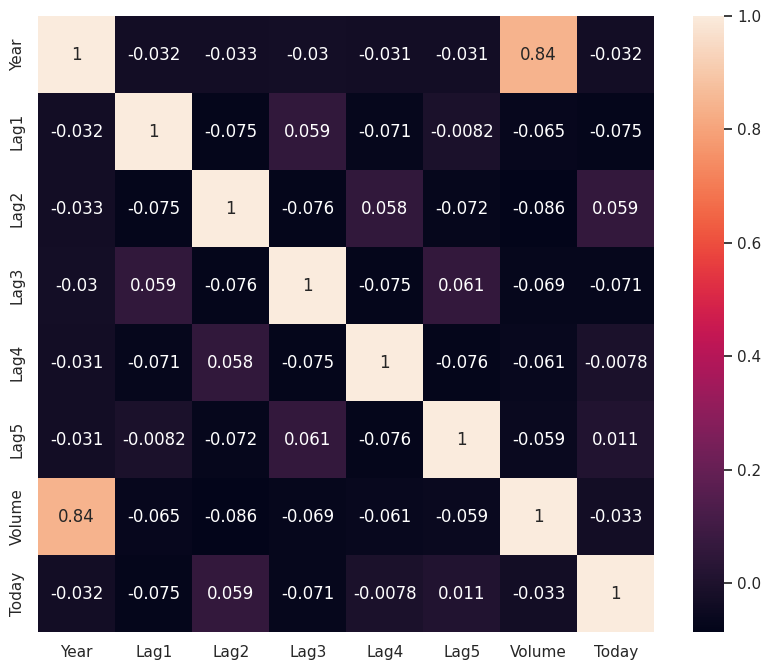

In [25]:
numeric_cols = weekly.select_dtypes(include=np.number).columns
weekly_numeric = weekly[numeric_cols]

plt.figure(figsize=(10, 8))
sns.heatmap(weekly_numeric.corr(), annot=True, square=True)

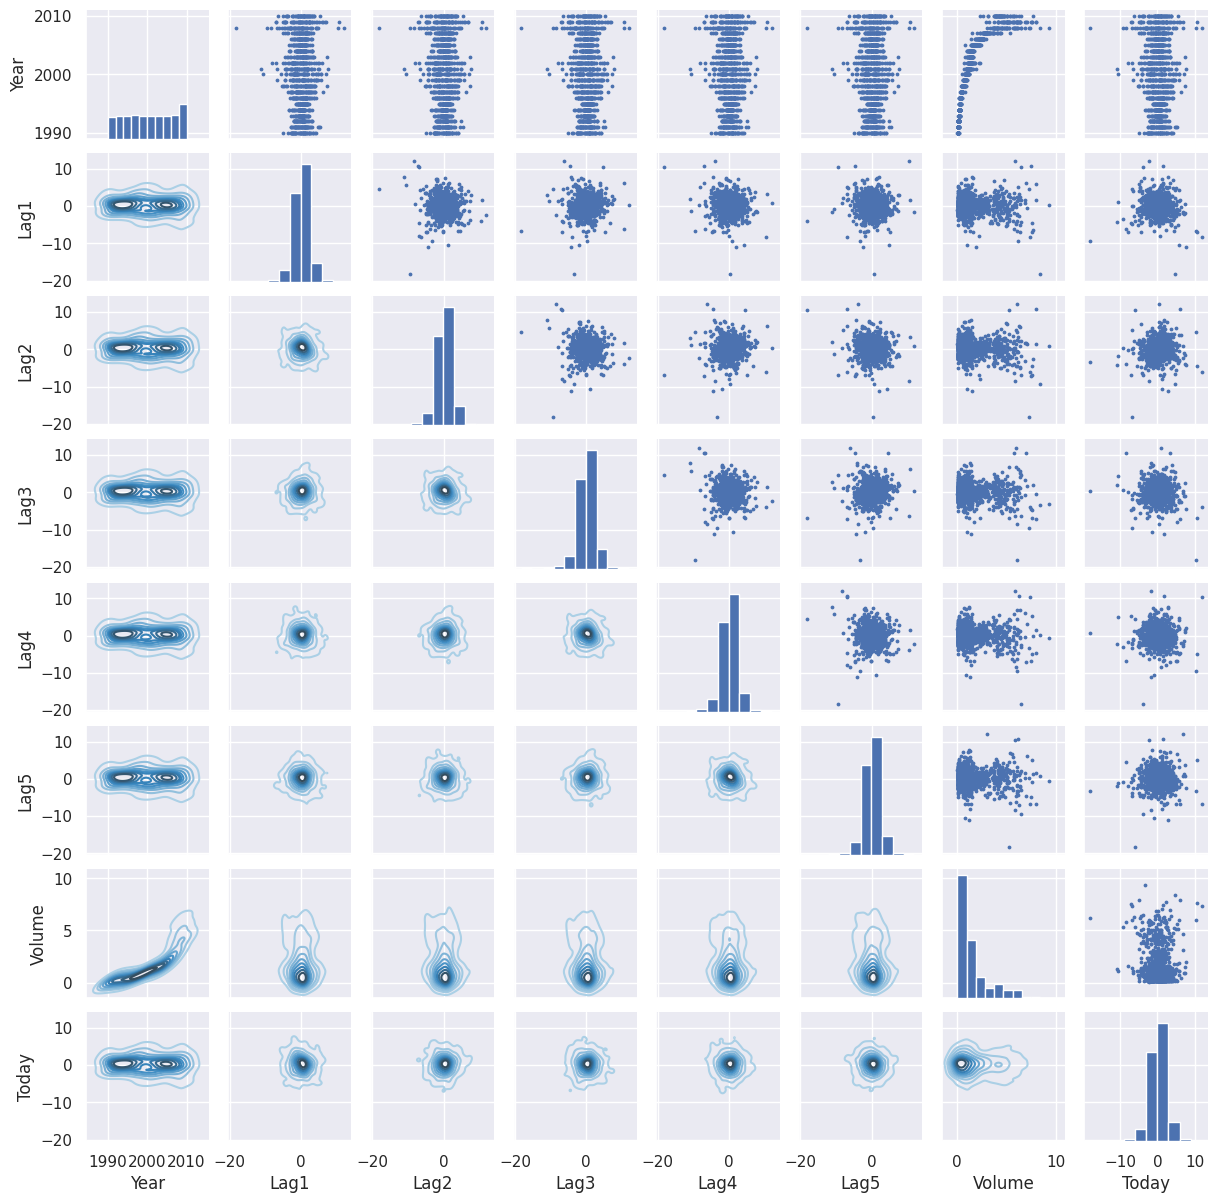

In [26]:
g = sns.PairGrid(weekly)
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.figure.set_size_inches(12, 12)

From the plots above we can see that there aren't any prominant relationships in the data aside from `Volume` growing with `Year`.

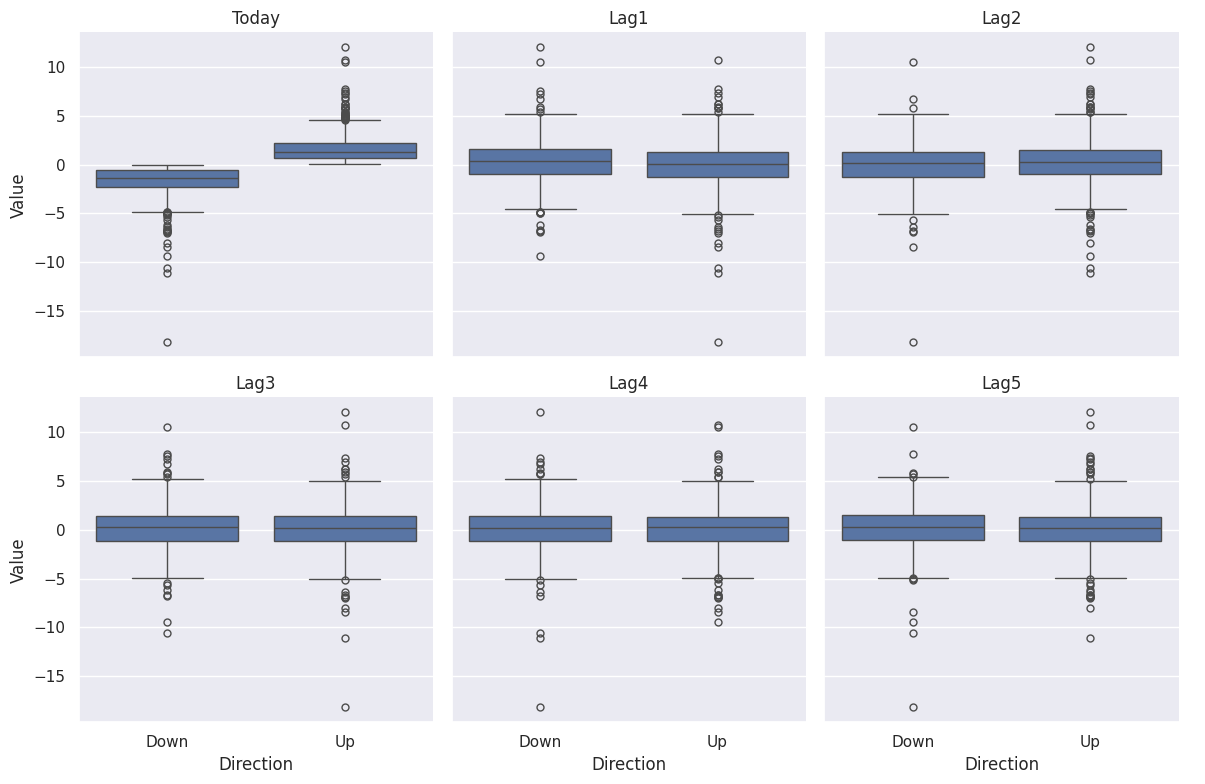

In [27]:
# Melt DataFrame to long format
weekly_melt = weekly.melt(id_vars=['Direction'], 
                  value_vars=['Today', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5'], 
                  var_name='Lag', 
                  value_name='Value')

# Create box plots for each Lag variable
g = sns.catplot(x='Direction', y='Value', col='Lag', 
                data=weekly_melt, kind='box', 
                col_wrap=3, height=4, aspect=1)
g.set_titles("{col_name}")
plt.show()

**(b)**

In [28]:
vars = weekly.columns.drop(['Today', 'Year', 'Direction'])
design = MS(vars)

X = design.fit_transform(weekly)
y = weekly['Direction'] == 'Up'

glm = sm.GLM(y, 
            X,
            family=sm.families.Binomial())

results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538


Only `Lag2` seems to be statistically significant at a confidence level of 5%.  

**(c)**

In [29]:
probs = results.predict()
probs

array([0.60862494, 0.60103144, 0.58756995, ..., 0.57972297, 0.55091703,
       0.52212163])

In [30]:
labels = np.array(['Down']*1089)
labels[probs>0.5] = "Up"

In [31]:
np.unique(labels, return_counts=True)

(array(['Down', 'Up'], dtype='<U4'), array([102, 987]))

In [32]:
np.unique(weekly['Direction'], return_counts=True)

(array(['Down', 'Up'], dtype=object), array([484, 605]))

In [33]:
confusion_table(labels, weekly['Direction'])

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [34]:
(54+ 557)/1089, 605/1089

(0.5610651974288338, 0.5555555555555556)

The fraction of correct predictions is `56.1%` which is `6.1%` better than random guessing and `0.55%` better than the null classifer (always predicting `Up`).

We can also see from the confusion matrix that our model made 430 type I errors and 48 type II errors.

**(d)**

In [35]:
weekly90_08 = weekly[weekly['Year'] <= 2008]
weekly90_08.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,1999.050761,0.124501,0.127820,0.122884,0.122227,0.120976,1.205973,0.130535
std,5.457286,2.269346,2.269069,2.272617,2.272625,2.274273,1.258204,2.279069
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1994.000000,-1.154000,-1.147000,-1.154000,-1.154000,-1.154000,0.307337,-1.154000
50%,1999.000000,0.231000,0.234000,0.231000,0.230000,0.230000,0.804848,0.231000
75%,2004.000000,1.334000,1.337000,1.337000,1.337000,1.337000,1.515846,1.337000
max,2008.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [36]:
weekly09_10 = weekly[weekly['Year'] > 2008]
weekly09_10.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,2009.500000,0.397635,0.371365,0.377548,0.369250,0.319058,5.066105,0.333298
std,0.502421,3.068538,3.074725,3.075192,3.073895,3.073650,1.147652,3.003296
min,2009.000000,-7.035000,-7.035000,-7.035000,-7.035000,-7.035000,2.390427,-7.035000
25%,2009.000000,-1.060750,-1.214250,-1.214250,-1.214250,-1.323250,4.234228,-1.060750
50%,2009.500000,0.522000,0.461500,0.522000,0.461500,0.437000,4.850717,0.461500
75%,2010.000000,2.239250,2.239250,2.239250,2.239250,2.204250,5.793837,2.204250
max,2010.000000,10.707000,10.707000,10.707000,10.707000,10.707000,7.963276,10.707000


In [37]:
design = MS(['Lag2'])

X = design.fit_transform(weekly90_08)
y = weekly90_08['Direction'] == 'Up'

glm = sm.GLM(y, 
            X,
            family=sm.families.Binomial())

results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.2033,0.064,3.162,0.002
Lag2,0.0581,0.029,2.024,0.043


In [38]:
X = design.fit_transform(weekly09_10)
probs = results.predict(X)
probs[:10]

985    0.526129
986    0.644736
987    0.486216
988    0.485200
989    0.519767
990    0.540125
991    0.623348
992    0.480993
993    0.451220
994    0.484881
dtype: float64

In [39]:
len(weekly09_10)

104

In [40]:
labels = np.array(['Down']*104)
labels[probs>0.5] = "Up"
confusion_table(labels, weekly09_10['Direction'])

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [41]:
(9+56)/104, 61/104

(0.625, 0.5865384615384616)

The fraction of correct predictions is `62.5%` which is `12.5%` better than random guessing and `3.8%` better than the null classifer (always predicting `Up`).

**(e)** Since we'll end up using the same code to fit all the models on the same data I'll create a function to make that easier:


In [42]:
def fit_and_test(model):
    design = MS(['Lag2'], intercept=False)

    X_train = design.fit_transform(weekly90_08)
    X_test = design.fit_transform(weekly09_10)
    L_train = weekly90_08['Direction']
    L_test = weekly09_10['Direction']

    mdl = model

    mdl = mdl.fit(X_train, L_train)
    
    pred = mdl.predict(X_test)
    return confusion_table(pred, L_test)


Using LDA:

In [43]:
lda = LDA(store_covariance=True)
fit_and_test(lda)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [44]:
(9+56)/(104)

0.625

The fraction of correct predictions is `62.5%` which is `12.5%` better than random guessing. We can also see that this resulted in the exact same confusion matrix as the Logistic Regression. 

**(f)** Using QDA:

In [45]:
qda = QDA(store_covariance=True)
fit_and_test(qda)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [46]:
61/104

0.5865384615384616

We can see that the QDA model here is equivalent to always predicting `Up` hence it has the same error rate as the null classifer .

**(g)** Using KNN with K = 1:

In [47]:
knn = KNeighborsClassifier(n_neighbors=1)
fit_and_test(knn)

Truth,Down,Up
Predicted,,
Down,22,32
Up,21,29


In [48]:
(22+29)/104

0.49038461538461536

The fraction of correct predictions is `49%` which is even worse than random guessing here and much worse than the null classifer.

**(h)** Using Naive Bayes:

In [49]:
nb = GaussianNB()
fit_and_test(nb)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


We can see that the Naive Bayes model here is equivalent to always predicting `Up` hence it has the same error rate as the null classifer and QDA.


**(i)** LDA and Logistic Regression seem to provide the best predictions with an accuracy of `62.5%`.

**(j)** We'll try a few different combinations of predictors, transformations, and interactions for each of the methods.

We'll start by making a slight modification to the function we defined above.

In [50]:
def fit_and_test(modelspec, model):
    """ 
    Takes a ModelSpec for the weekly dataset and a model and trains it on data from 1990 to 2008, 
    then tests it on the data from 2009 to 2010 and returns the fraction of correct predictions and a confusion 
    matrix for the given model and testing.
    """
    design = modelspec

    X_train = design.fit_transform(weekly90_08)
    X_test = design.fit_transform(weekly09_10)
    L_train = weekly90_08['Direction']
    L_test = weekly09_10['Direction']

    mdl = model

    mdl = mdl.fit(X_train, L_train)
    
    pred = mdl.predict(X_test)
    conf_mat = confusion_table(pred, L_test)
    
    print(model.__repr__())
    print(f'fraction of correct predictions: {(conf_mat.iloc[0, 0] + conf_mat.iloc[1, 1])/len(pred):.3f}')
    return conf_mat

In [51]:
modelspec = MS(['Lag2', 'Lag5', 'Lag3',  ('Lag2', 'Lag5'), ('Lag5', 'Lag3')])
fit_and_test(modelspec, LogisticRegression())

LogisticRegression()
fraction of correct predictions: 0.606


Truth,Down,Up
Predicted,,
Down,9,7
Up,34,54


In [52]:
modelspec = MS(['Lag2', 'Volume',  ('Lag2', 'Volume')])
fit_and_test(modelspec, LogisticRegression())

LogisticRegression()
fraction of correct predictions: 0.529


Truth,Down,Up
Predicted,,
Down,19,25
Up,24,36


In [53]:
modelspec = MS(['Lag2', 'Lag5', 'Lag3',  ('Lag2', 'Lag5'), ('Lag5', 'Lag3')], intercept=False)
for model in [LDA(), QDA(), GaussianNB()]:
    print(fit_and_test(modelspec, model))
    print()

LinearDiscriminantAnalysis()
fraction of correct predictions: 0.615
Truth      Down  Up
Predicted          
Down          9   6
Up           34  55

QuadraticDiscriminantAnalysis()
fraction of correct predictions: 0.538
Truth      Down  Up
Predicted          
Down         11  16
Up           32  45

GaussianNB()
fraction of correct predictions: 0.529
Truth      Down  Up
Predicted          
Down         10  16
Up           33  45



In [54]:
modelspec = MS(['Lag1', 'Lag2', 'Lag5',  ('Lag1', 'Lag2'), ('Lag5', 'Lag2')], intercept=False)
for model in [LDA(), QDA(), GaussianNB()]:
    print(fit_and_test(modelspec, model))
    print()

LinearDiscriminantAnalysis()
fraction of correct predictions: 0.567
Truth      Down  Up
Predicted          
Down          8  10
Up           35  51

QuadraticDiscriminantAnalysis()
fraction of correct predictions: 0.538
Truth      Down  Up
Predicted          
Down         12  17
Up           31  44

GaussianNB()
fraction of correct predictions: 0.529
Truth      Down  Up
Predicted          
Down          8  14
Up           35  47



Looking at all the combinations of variables and models above we can see that not many get close to LDA and LR's accuracy score of `62.5%` when fit on `Lag2`. Closest score we had was LDA fit on `Lag2`, `Lag5`, `Lag3`, (`Lag2` x `Lag5`), (`Lag5` x `Lag3`) with an accuracy of `61.5%`. 

In [55]:
modelspec = MS(['Lag2'], intercept=False)
for k in range(1, 31):
    print(fit_and_test(modelspec, KNeighborsClassifier(n_neighbors=k)))
    print()

KNeighborsClassifier(n_neighbors=1)
fraction of correct predictions: 0.490
Truth      Down  Up
Predicted          
Down         22  32
Up           21  29

KNeighborsClassifier(n_neighbors=2)
fraction of correct predictions: 0.462
Truth      Down  Up
Predicted          
Down         31  44
Up           12  17

KNeighborsClassifier(n_neighbors=3)
fraction of correct predictions: 0.558
Truth      Down  Up
Predicted          
Down         16  19
Up           27  42

KNeighborsClassifier(n_neighbors=4)
fraction of correct predictions: 0.577
Truth      Down  Up
Predicted          
Down         26  27
Up           17  34

KNeighborsClassifier()
fraction of correct predictions: 0.538
Truth      Down  Up
Predicted          
Down         16  21
Up           27  40

KNeighborsClassifier(n_neighbors=6)
fraction of correct predictions: 0.510
Truth      Down  Up
Predicted          
Down         20  28
Up           23  33

KNeighborsClassifier(n_neighbors=7)
fraction of correct predictions: 0.548
Tr

Trying the KNN classifier using the `Lag2` variable and neighbors from 1 to 30, we can see that it yielded the highest accuracy of `59.6%` for values of K = 13, 17, 20, 22. 

### **Q14.**

In [4]:
auto = load_data('Auto')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [5]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6+ KB


In [6]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


**(a)**



In [7]:
mpg01 = auto['mpg'] > auto['mpg'].median()
mpg01


name
chevrolet chevelle malibu    False
buick skylark 320            False
plymouth satellite           False
amc rebel sst                False
ford torino                  False
                             ...  
ford mustang gl               True
vw pickup                     True
dodge rampage                 True
ford ranger                   True
chevy s-10                    True
Name: mpg, Length: 392, dtype: bool

In [8]:
auto['mpg01'] = mpg01.astype(int)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,0
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,0
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,0
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,0
ford torino,17.0,8,302.0,140,3449,10.5,70,1,0


**(b)**

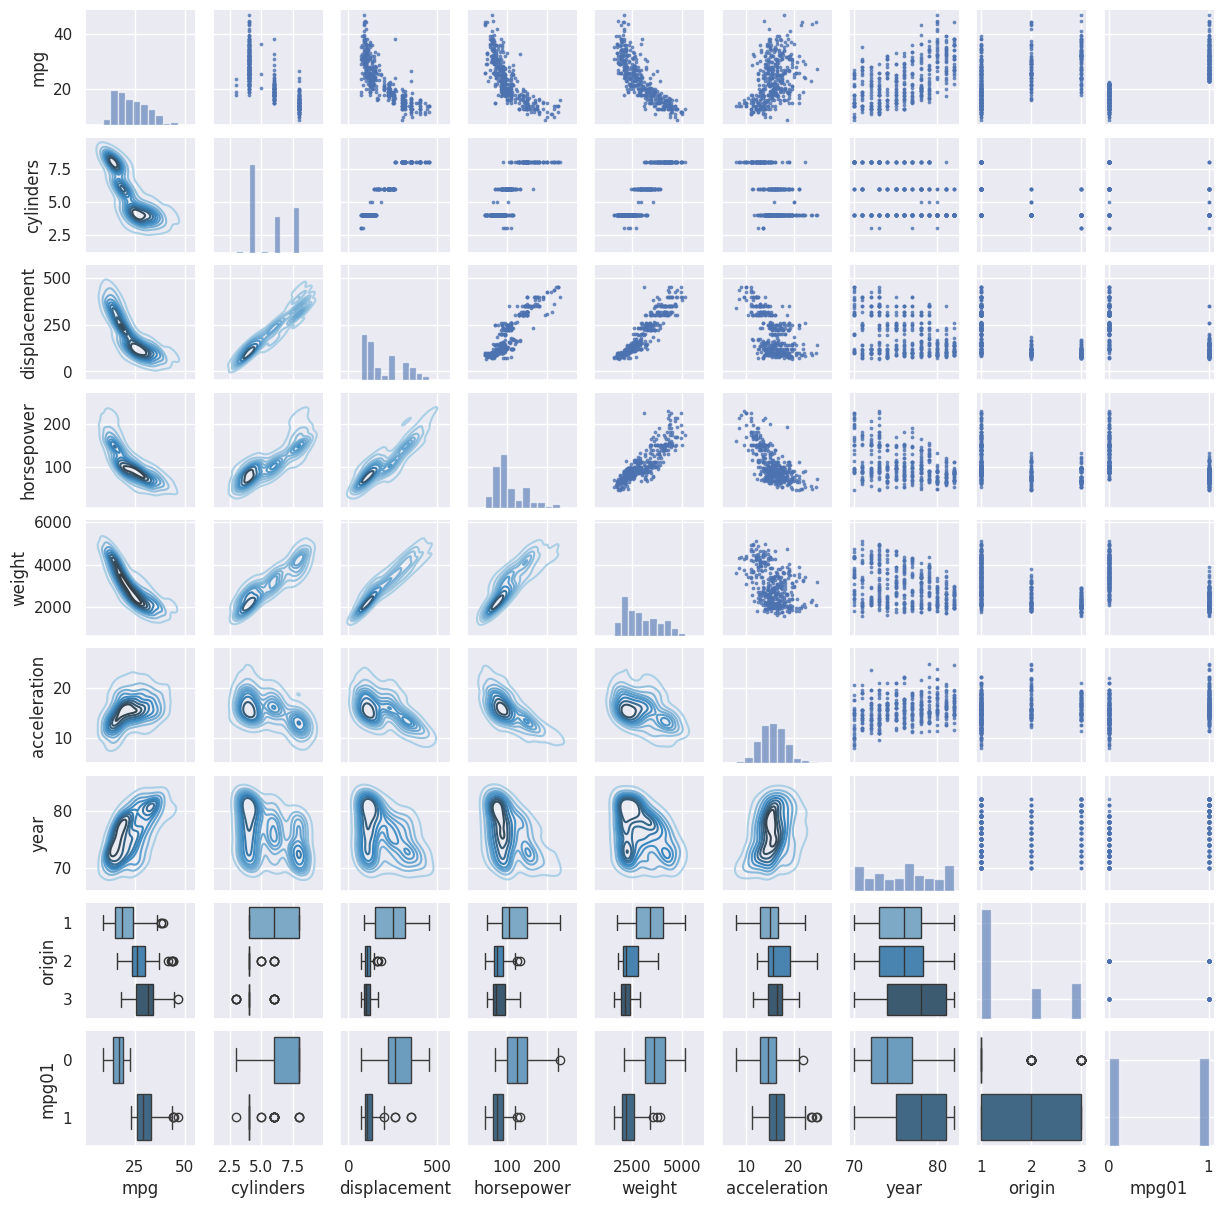

In [54]:
g = sns.PairGrid(auto)
g.map_upper(plt.scatter, s=3, alpha=0.7)
g.map_diag(plt.hist, alpha=0.6)

def lower_plots(x, y, **kwargs):
    if y.name in ['mpg01', 'origin']: 
        num_colors_needed = y.nunique()
        sns.boxplot(x=x, y=y, orient='h', hue=y, palette=sns.color_palette('Blues_d', n_colors=num_colors_needed), **kwargs)  # Horizontal boxplot
    else:
        sns.kdeplot(x=x, y=y, cmap='Blues_d', **kwargs)  # KDE plot

g.map_lower(lower_plots)
g.figure.set_size_inches(12, 12);

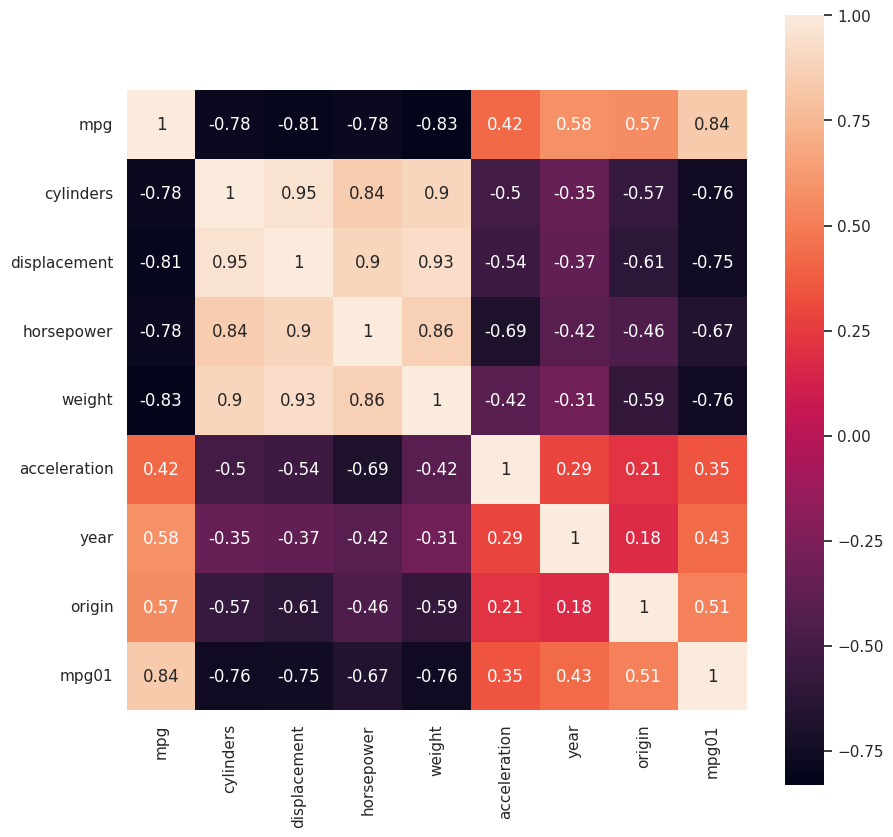

In [47]:
plt.figure(figsize=(10, 10))
sns.heatmap(auto.corr(), annot=True, square=True);

Looking at the heatmap and the plots above we can see that many of them have some sort of relationship with `mpg01`, the most useful for predicting `mpg01` would likely be features like `cylinders`, `displacement`, `horsepower`, `weight`.

**(c)**


In [237]:
X = auto[['cylinders', 'displacement', 'horsepower', 'weight']]
y = auto['mpg01']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

**(d)** LDA:

In [238]:
lda = LDA()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)
lda_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0])

Defining a quick function to get the error rate from a confusion matrix.

In [239]:
def get_error_rate(conf_mat):
    return (conf_mat.iloc[0, 1] + conf_mat.iloc[1, 0])/conf_mat.sum().sum()

In [240]:
conf_mat = confusion_table(lda_pred, y_test)
conf_mat

Truth,0,1
Predicted,,
0,58,3
1,7,50


In [241]:
get_error_rate(conf_mat)

0.0847457627118644

The test error rate for LDA is **8.5%**.

**(e)** QDA:

In [242]:
qda = QDA()
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)
qda_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0])

In [243]:
conf_mat = confusion_table(qda_pred, y_test)
conf_mat

Truth,0,1
Predicted,,
0,61,5
1,4,48


In [244]:
get_error_rate(conf_mat)

0.07627118644067797

The test error rate for QDA is **7.6%**.

**(f)**


In [245]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0])

In [246]:
conf_mat = confusion_table(lr_pred, y_test)
conf_mat

Truth,0,1
Predicted,,
0,59,4
1,6,49


In [247]:
get_error_rate(conf_mat)

0.0847457627118644

The test error rate for Logistic Regression is **8.5%**.

**(g)** Naive Bayes:

In [248]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0])

In [249]:
conf_mat = confusion_table(nb_pred, y_test)
conf_mat

Truth,0,1
Predicted,,
0,60,5
1,5,48


In [250]:
get_error_rate(conf_mat)

0.0847457627118644

The test error rate for Naive Bayes is **8.5%**.

**(h)** KNN:

For this we'll use `StandardScaler` since KNN uses distances between points to make predictions.

In [251]:
scaler = StandardScaler(with_mean=True,
                        with_std=True,
                        copy=True)

X = auto[['cylinders', 'displacement', 'horsepower', 'weight']]
y = auto['mpg01']


X_std = scaler.fit_transform(X)
feature_std = pd.DataFrame(
                 X_std,
                 columns=X.columns);
feature_std.std()

cylinders       1.001278
displacement    1.001278
horsepower      1.001278
weight          1.001278
dtype: float64

In [252]:
X_train_std, X_test_std, y_train_std, y_test_std  = train_test_split(np.asarray(feature_std), y, test_size=0.3,random_state=1)

In [253]:
error_rate = {}
for k in range(1, 200):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train_std, y_train_std)
    knn_pred = knn.predict(X_test_std)
    conf_mat = confusion_table(knn_pred, y_test_std)
    error_rate[k] = get_error_rate(conf_mat)

(8, 0.059322033898305086)

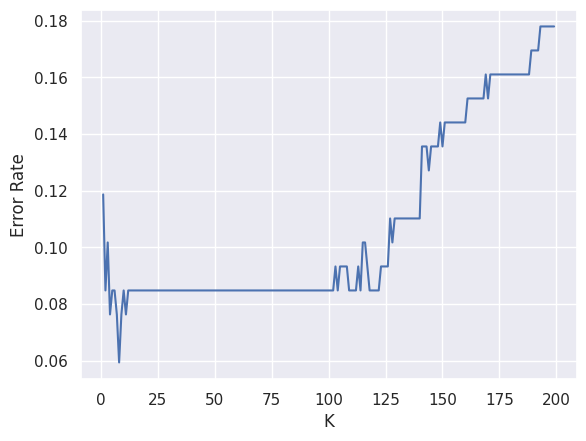

In [254]:
plt.plot(error_rate.keys(), error_rate.values())
plt.xlabel('K')
plt.ylabel('Error Rate');
k_min = min(error_rate, key=error_rate.get)
k_min, error_rate[k_min]

The best value for K in the KNN classifier for this dataset is **8** which resulted in the minimal error rate of **5.93%**.

### **Q15.**

**(a)**

In [63]:
def Power():
    """ Prints the result of raising 2 to the 3rd power """
    print(2 ** 3)

In [64]:
Power()

8


**(b)**


In [65]:
def Power2(x, a):
    """ Prints the result of raising x to the power a """
    print(x ** a)

In [66]:
Power2(3, 8)

6561


**(c)**

In [67]:
Power2(10, 3) 
Power2(8, 17)
Power2(131, 3)

1000
2251799813685248
2248091


**(d)**


In [68]:
def Power3(x, a):
    """ returns the result of raising x to the power a """
    result = x ** a
    return result

**(e)**


In [69]:
x = np.arange(1, 11)
y = Power3(x, 2)

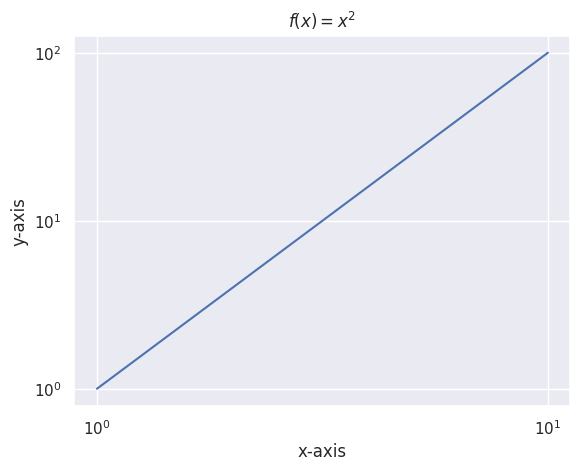

In [70]:
plt.plot (x, y)

plt.title('$f(x) = x^2$')
plt.xlabel('x-axis')
plt.ylabel('y-axis');
plt.xscale('log')
plt.yscale('log')

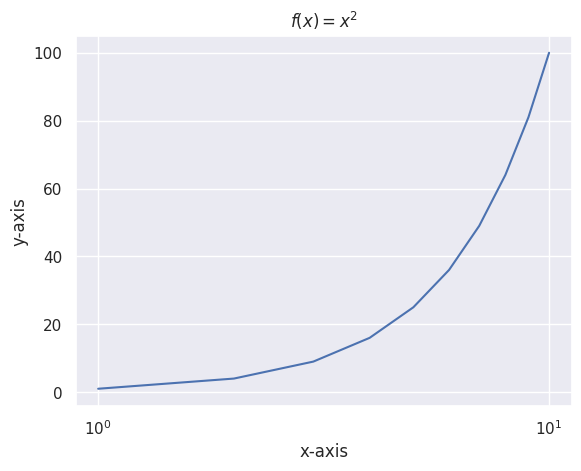

In [71]:
plt.plot (x, y)

plt.title('$f(x) = x^2$')
plt.xlabel('x-axis')
plt.ylabel('y-axis');
plt.xscale('log')

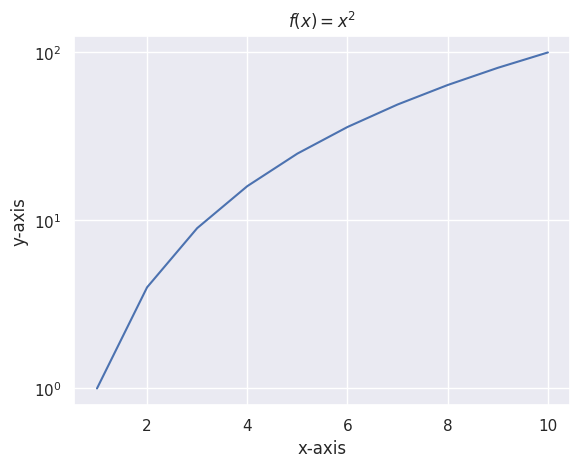

In [72]:
plt.plot (x, y)

plt.title('$f(x) = x^2$')
plt.xlabel('x-axis')
plt.ylabel('y-axis');
plt.yscale('log')

**(f)**

In [73]:
def PlotPower(x, a):
    y = Power3(x, a)
    plt.plot (x, y)

    plt.title(f'$f(x) = x^{a}$')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis');

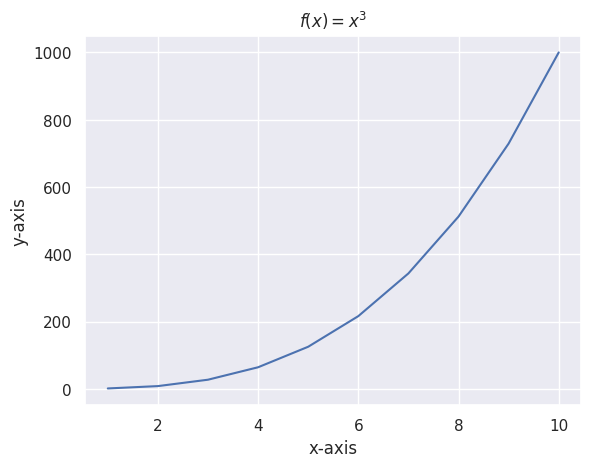

In [74]:
PlotPower(np.arange(1, 11), 3)

### **Q16.** 
The same as Q14.

In [255]:
boston = load_data('Boston')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [256]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [257]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


First we'll create a variable `crim01` which indicates whether the crime rate is below (0) or above (1) the median.

In [262]:
boston['crim01'] = (boston['crim'] > boston['crim'].median()).astype(int)
boston['crim01'].sample(5, random_state=1)

307    0
343    0
47     0
67     0
362    1
Name: crim01, dtype: int64

Now we'll explore the data to see what features would be useful in predicting `crim01`.

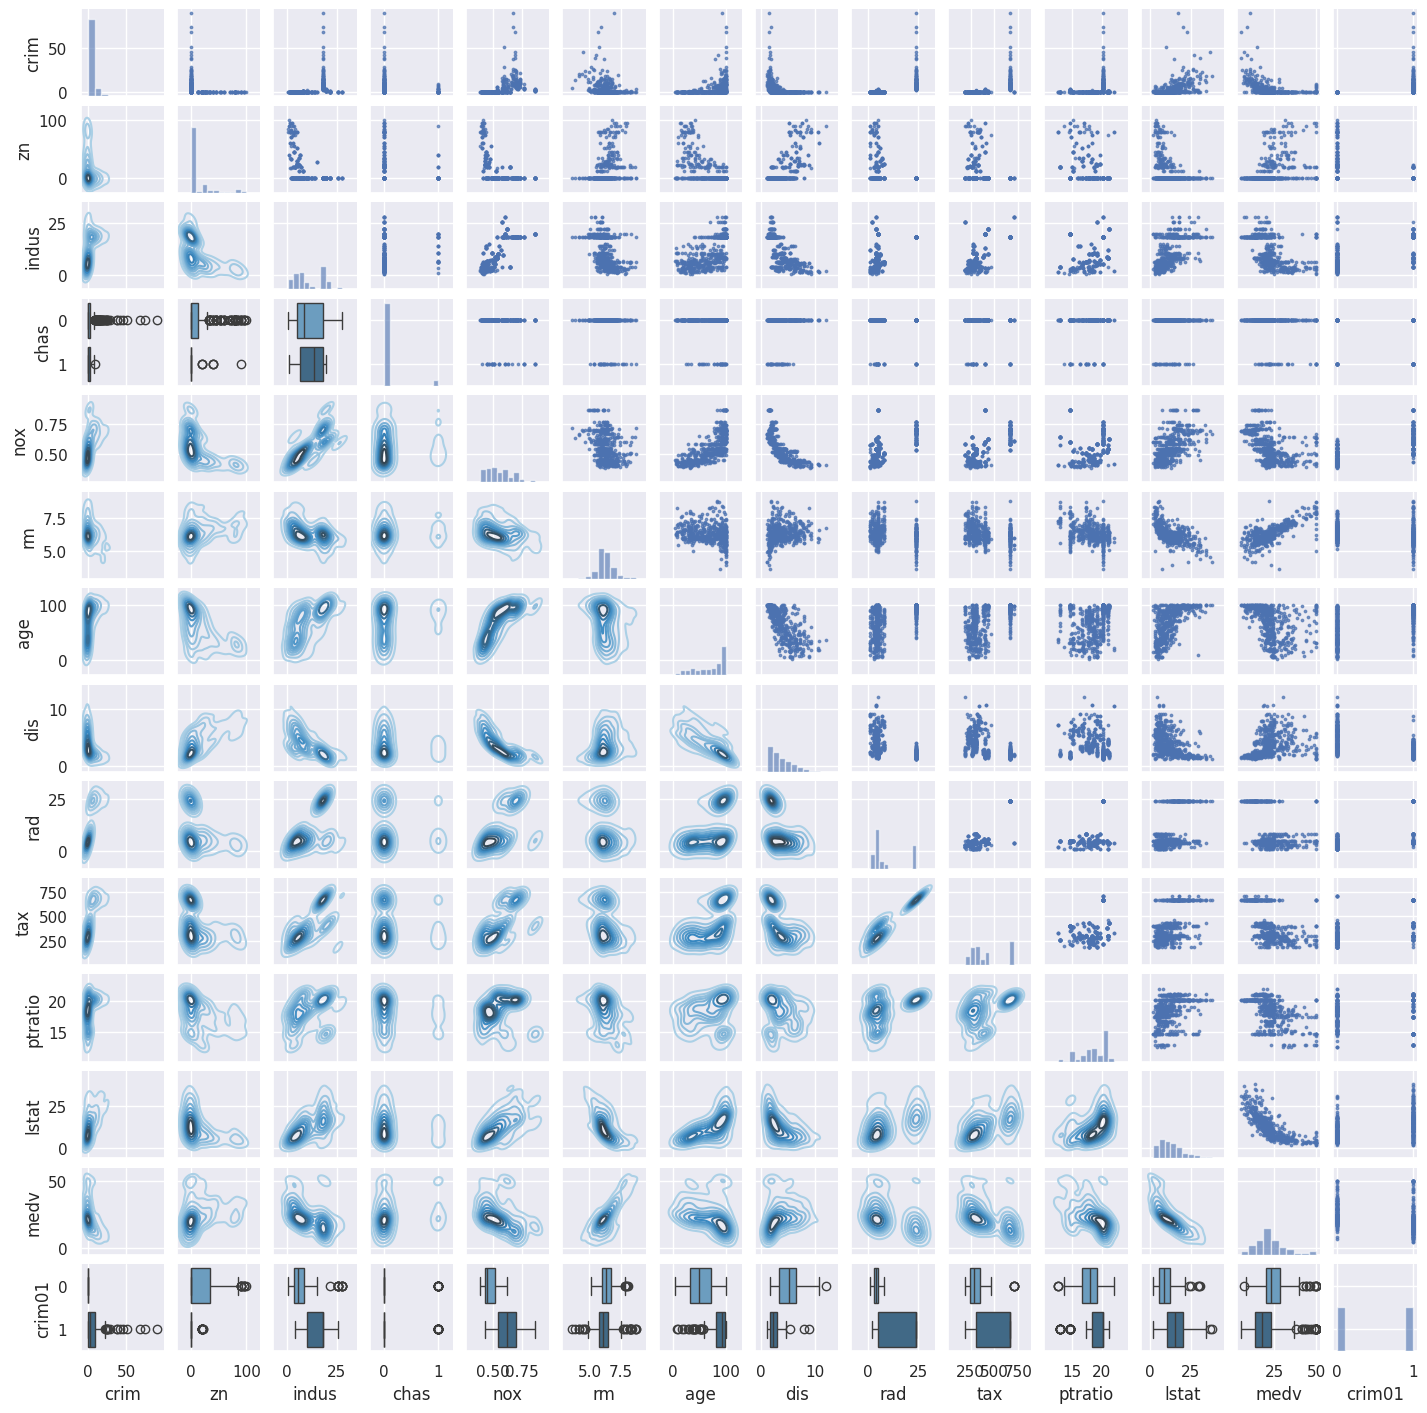

In [265]:
g = sns.PairGrid(boston)
g.map_upper(plt.scatter, s=3, alpha=0.7)
g.map_diag(plt.hist, alpha=0.6)

def lower_plots(x, y, **kwargs):
    if y.name in ['crim01', 'chas']: 
        num_colors_needed = y.nunique()
        sns.boxplot(x=x, y=y, orient='h', hue=y, palette=sns.color_palette('Blues_d', n_colors=num_colors_needed), **kwargs)  # Horizontal boxplot
    else:
        sns.kdeplot(x=x, y=y, cmap='Blues_d', **kwargs)  # KDE plot

g.map_lower(lower_plots)
g.figure.set_size_inches(14, 14);

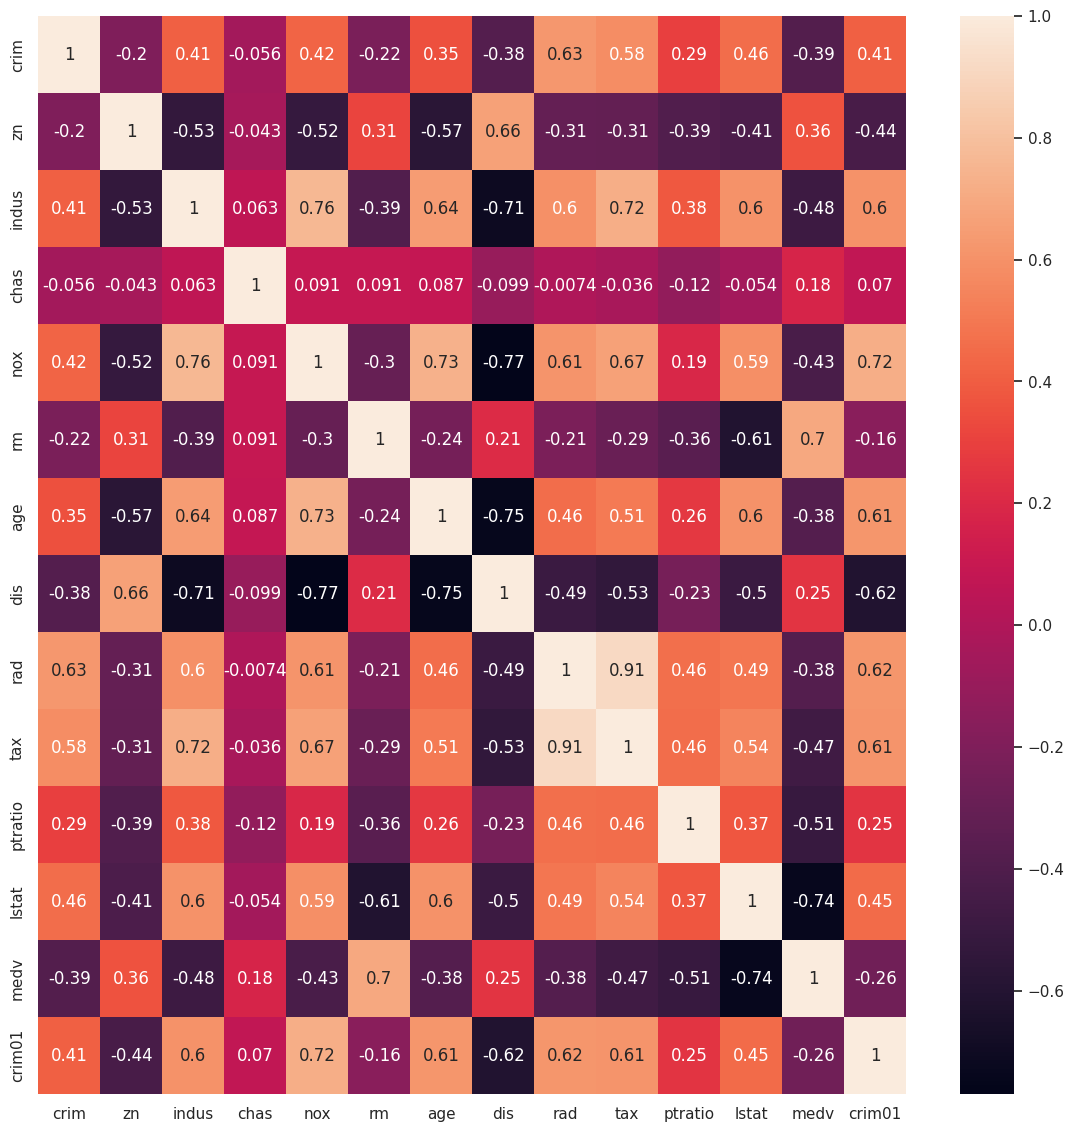

In [268]:
plt.figure(figsize=(14, 14))
sns.heatmap(boston.corr(), annot=True);

Looking at the heatmap and the plots, I decided to use the variables `indus`, `nox`, `age`, `dis`, `rad`, `tax` because seem to have strong relationships with `crim01`.

In [331]:
X = boston[['indus', 'nox', 'age', 'dis', 'rad', 'tax']]
y = boston['crim01']

In [332]:
def fit_and_get_error_rate(model, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    mdl = model
    
    mdl.fit(X_train, y_train)
    pred = mdl.predict(X_test)
    conf_mat = confusion_table(pred, y_test)
    return get_error_rate(conf_mat)

Using the function above on the 4 models to fit them and get their error rates:

In [333]:
for model in [LDA(), QDA(), LogisticRegression(max_iter=1000), GaussianNB()]:
    print(f'{model.__str__().split("(")[0]}: {fit_and_get_error_rate(model, X, y)}\n')

LinearDiscriminantAnalysis: 0.17763157894736842

QuadraticDiscriminantAnalysis: 0.125

LogisticRegression: 0.17763157894736842

GaussianNB: 0.19078947368421054



We can see the test error rate for each of the models and see that QDA performed the best here with a test error rate of **12.5%**.

Now to fit the KNN classifier we'll start by standardizing the data.

In [334]:
scaler = StandardScaler(with_mean=True,
                        with_std=True,
                        copy=True)

X_std = scaler.fit_transform(X)

feature_std = pd.DataFrame(
                 X_std,
                 columns=X.columns);

feature_std.std()

indus    1.00099
nox      1.00099
age      1.00099
dis      1.00099
rad      1.00099
tax      1.00099
dtype: float64

In [335]:
X_train_std, X_test_std, y_train_std, y_test_std  = train_test_split(feature_std, y, test_size=0.4,random_state=1)

In [336]:
error_rate = {}
for k in range(1, 200):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train_std, y_train_std)
    knn_pred = knn.predict(X_test_std)
    conf_mat = confusion_table(knn_pred, y_test_std)
    error_rate[k] = get_error_rate(conf_mat)

(6, 0.06403940886699508)

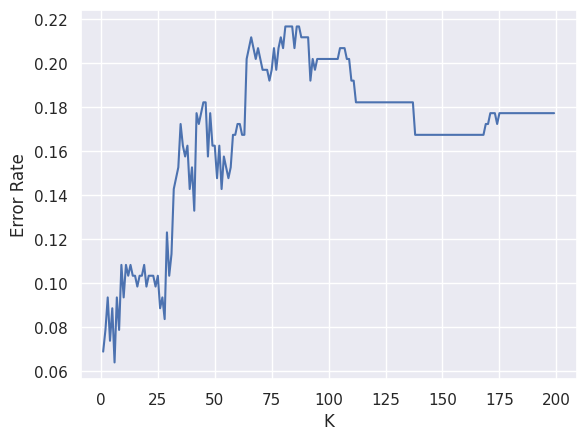

In [337]:
plt.plot(error_rate.keys(), error_rate.values())
plt.xlabel('K')
plt.ylabel('Error Rate');
k_min = min(error_rate, key=error_rate.get)
k_min, error_rate[k_min]

K = 6 seems to be the best value for the KNN classifier with a test error rate of **6.4%**.